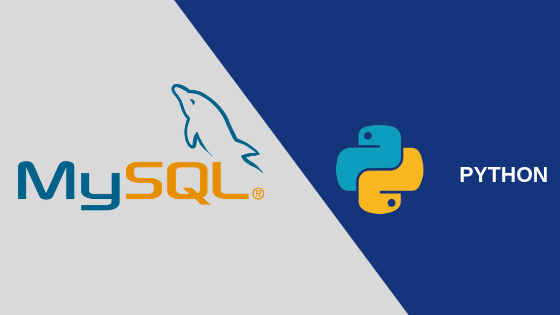

# Python Mysql


     MySQL is a Relational Database Management System (RDBMS) whereas the structured Query Language (SQL) is the language used for handling the RDBMS using commands i.e Creating, Inserting, Updating and Deleting the data from the databases.
    A connector is employed when we have to use MySQL with other programming languages. The work of mysql-connector is to provide access to MySQL Driver to the required language. Thus, it generates a connection between the programming language and the MySQL Server.
     
     
     Python can be used in database applications.
     
     
# Install MySQL Driver
    Python needs a MySQL driver to access the MySQL database.

   
    
   ## "pip3 install mysql-connector-python"



In [1]:
!pip install mysql-connector-python

# Test MySql Connector
 
 
 
     To test if the installation was successful, or if you already have "MySQL Connector" installed, create a Python page with the following content:

In [2]:
import mysql.connector

# Create Connection :
 

    Start by creating a connection to the database.

    Use the username and password from your MySQL database:

In [3]:
mydb=mysql.connector.connect(host="localhost",user='root',password='Kanha@8144')

print(mydb)


## Creating Cursor
 
 
     The MySQLCursor of mysql-connector-python (and similar libraries) is used to execute statements to communicate with the MySQL database. Using the methods of it you can execute SQL statements, fetch data from the result sets, call procedures.

In [4]:
cursor=mydb.cursor()

**Now you can start querying the database using SQL statements.**

# Creating Database


    To create a database in MySQL, use the "CREATE DATABASE" statement:

In [46]:
cursor.execute("CREATE DATABASE IF NOT EXISTS mydatabase")

**If the above code was executed with no errors, you have successfully created a database.**

# Check if Database Exists
    You can check if a database exist by listing all databases in your system by using the "SHOW DATABASES" statement:

In [47]:
cursor.execute("SHOW DATABASES")

cursor.fetchall()

[('cardataset',),
 ('information_schema',),
 ('mydatabase',),
 ('mysql',),
 ('performance_schema',),
 ('practicedb',),
 ('students',),
 ('students1',),
 ('sys',)]

# Creating Table

    To create a table in MySQL, use the "CREATE TABLE" statement.

    Make sure you define the name of the database when you create the table

In [49]:
cursor.execute(" CREATE TABLE IF NOT EXISTS mydatabase.customers(name VARCHAR(255), address VARCHAR(255))")

# Check if Table Exists
    You can check if a table exist by listing all tables in your database with the "SHOW TABLES" statement:



In [50]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor = mydb.cursor()

cursor.execute("SHOW TABLES")
cursor.fetchall()

[('customers',), ('departments',), ('employees',)]

**Or we can perform this way also**

In [51]:
cursor.execute("USE mydatabase ")
cursor.execute("SHOW TABLES")
cursor.fetchall()

[('customers',), ('departments',), ('employees',)]

# Primary Key
    When creating a table, you should also create a column with a unique key for each record.

    This can be done by defining a PRIMARY KEY.

    We use the statement "INT AUTO_INCREMENT PRIMARY KEY" which will insert a unique number for each record. Starting at 1, and increased by one for each record.



In [53]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor = mydb.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS customers (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), address VARCHAR(255))")

**If the table already exists, use the ALTER TABLE keyword:**

In [55]:
#cursor.execute("ALTER TABLE  customers ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY")

# Insert Into Table
    To fill a table in MySQL, use the "INSERT INTO" statement.

In [12]:
query="INSERT INTO customers (name,address) VALUES (%s,%s)"
val=('Prasad','CDA 5')

cursor.execute(query,val)

**we can also write the querry this way using f string**

name = 'Prasad'
address = 'CDA 5'

query = f"INSERT INTO customers (name, address) VALUES ('{name}', '{address}')"

cursor.execute(query)

**or**

cursor.execute("INSERT INTO customers (name, address) VALUES (%s, %s)", ('Prasad', 'CDA 5'))



In [13]:
mydb.commit()

In [14]:
print(cursor.rowcount, "record inserted.")


1 record inserted.


In [15]:
cursor.execute("SELECT * FROM customers")
cursor.fetchall()

[('Prasad', 'CDA 5', 1)]

**Important!: Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.**


# Insert Multiple Rows
    To insert multiple rows into a table, use the executemany() method.

    The second parameter of the executemany() method is a list of tuples, containing the data you want to insert:

In [16]:
query = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = [
  ('Peter', 'Lowstreet 4'),
  ('Amy', 'Apple st 652'),
  ('Hannah', 'Mountain 21'),
  ('Michael', 'Valley 345'),
  ('Sandy', 'Ocean blvd 2'),
  ('Betty', 'Green Grass 1'),
  ('Richard', 'Sky st 331'),
  ('Susan', 'One way 98'),
  ('Vicky', 'Yellow Garden 2'),
  ('Ben', 'Park Lane 38'),
  ('William', 'Central st 954'),
  ('Chuck', 'Main Road 989'),
  ('Viola', 'Sideway 1633')
]

cursor.executemany(query, val)
mydb.commit()

In [17]:
print(cursor.rowcount, "rows inserted.")

13 rows inserted.


In [18]:
cursor.execute("SELECT * FROM customers")
cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14)]

# Get Inserted ID
    You can get the id of the row you just inserted by asking the cursor object.

 **Note: If you insert more than one row, the id of the last inserted row is returned.**

In [24]:
# List of tuples with values for multiple rows
values = [
    ('Alice', '123 Main St'),
    ('Bob', '456 Elm St'),
    ('Charlie', '789 Oak St')
]

# SQL query with multiple value sets
query = "INSERT INTO customers (name, address) VALUES (%s, %s)"

cursor.executemany(query, values)


In [26]:
print("last record inserted, ID:", cursor.lastrowid)

last record inserted, ID: 15


In [27]:
cursor.execute("SELECT * FROM customers")
cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14),
 ('Alice', '123 Main St', 15),
 ('Bob', '456 Elm St', 16),
 ('Charlie', '789 Oak St', 17)]

# Select From a Table
    To select from a table in MySQL, use the "SELECT" statement:



In [29]:
cursor.execute("SELECT * FROM customers")
cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14),
 ('Alice', '123 Main St', 15),
 ('Bob', '456 Elm St', 16),
 ('Charlie', '789 Oak St', 17)]

**Note: We use the fetchall() method, which fetches all rows from the last executed statement.**

# Selecting Columns

    To select only some of the columns in a table, use the "SELECT" statement followed by the column name(s):

In [31]:
cursor.execute("SELECT name,address FROM customers")
cursor.fetchall()

[('Prasad', 'CDA 5'),
 ('Peter', 'Lowstreet 4'),
 ('Amy', 'Apple st 652'),
 ('Hannah', 'Mountain 21'),
 ('Michael', 'Valley 345'),
 ('Sandy', 'Ocean blvd 2'),
 ('Betty', 'Green Grass 1'),
 ('Richard', 'Sky st 331'),
 ('Susan', 'One way 98'),
 ('Vicky', 'Yellow Garden 2'),
 ('Ben', 'Park Lane 38'),
 ('William', 'Central st 954'),
 ('Chuck', 'Main Road 989'),
 ('Viola', 'Sideway 1633'),
 ('Alice', '123 Main St'),
 ('Bob', '456 Elm St'),
 ('Charlie', '789 Oak St')]

# Select row Using the fetchone() Method
    If you are only interested in one row, you can use the fetchone() method.

    The fetchone() method will return the first row of the result:

In [32]:
cursor.execute("SELECT * FROM customers")
cursor.fetchone()

('Prasad', 'CDA 5', 1)

In [36]:
cursor.fetchmany()

[('Richard', 'Sky st 331', 8)]

In [39]:
cursor.fetchmany(5)

[('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12)]

# Select With a Filter
    When selecting records from a table, you can filter the selection by using the "WHERE" statement:

In [41]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor = mydb.cursor()




query= "SELECT * FROM customers WHERE address ='Park Lane 38'"

cursor.execute(query)

cursor.fetchall()

[('Ben', 'Park Lane 38', 11)]

# Wildcard Characters
    You can also select the records that starts, includes, or ends with a given letter or phrase.

    Use the %  to represent wildcard characters:

In [42]:
sql = "SELECT * FROM customers WHERE address LIKE '%way%'"

cursor.execute(sql)

cursor.fetchall()

[('Susan', 'One way 98', 9), ('Viola', 'Sideway 1633', 14)]

In [46]:
sql = "SELECT * FROM customers WHERE address LIKE 'Green%' "

cursor.execute(sql)

cursor.fetchall()

[('Betty', 'Green Grass 1', 7)]

In [47]:
sql = "SELECT * FROM customers WHERE address LIKE '%Garden 2'"

cursor.execute(sql)

cursor.fetchall()

[('Vicky', 'Yellow Garden 2', 10)]

In [48]:
sql = "SELECT * FROM customers WHERE address LIKE '%Garden%'"

cursor.execute(sql)

cursor.fetchall()

[('Vicky', 'Yellow Garden 2', 10)]

# Prevent SQL Injection
    When query values are provided by the user, you should escape the values.

    This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

    The mysql.connector module has methods to escape query values:



In [51]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address = %s"
adr = ("Yellow Garden 2", )

cursor.execute(sql, adr)

cursor.fetchall()

[('Vicky', 'Yellow Garden 2', 10)]

In [52]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address = %s"
adr = ("One way 98", )

cursor.execute(sql, adr)

cursor.fetchall()

[('Susan', 'One way 98', 9)]

# Sort the Result
    Use the ORDER BY statement to sort the result in ascending or descending order.

    The ORDER BY keyword sorts the result ascending by default. To sort the result in descending order, use the DESC keyword.

In [53]:
sql="SELECT * FROM customers ORDER BY name"
cursor.execute(sql)
cursor.fetchall()


[('Amy', 'Apple st 652', 3),
 ('Ben', 'Park Lane 38', 11),
 ('Betty', 'Green Grass 1', 7),
 ('Chuck', 'Main Road 989', 13),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5),
 ('Peter', 'Lowstreet 4', 2),
 ('Prasad', 'CDA 5', 1),
 ('Richard', 'Sky st 331', 8),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Viola', 'Sideway 1633', 14),
 ('William', 'Central st 954', 12)]

In [54]:
sql="SELECT * FROM customers ORDER BY address "
cursor.execute(sql)
cursor.fetchall()


[('Amy', 'Apple st 652', 3),
 ('Prasad', 'CDA 5', 1),
 ('William', 'Central st 954', 12),
 ('Betty', 'Green Grass 1', 7),
 ('Peter', 'Lowstreet 4', 2),
 ('Chuck', 'Main Road 989', 13),
 ('Hannah', 'Mountain 21', 4),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Susan', 'One way 98', 9),
 ('Ben', 'Park Lane 38', 11),
 ('Viola', 'Sideway 1633', 14),
 ('Richard', 'Sky st 331', 8),
 ('Michael', 'Valley 345', 5),
 ('Vicky', 'Yellow Garden 2', 10)]

In [55]:
sql="SELECT * FROM customers ORDER BY id "
cursor.execute(sql)
cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14)]

## ORDER BY DESC
    Use the DESC keyword to sort the result in a descending order.

In [56]:
sql = "SELECT * FROM customers ORDER BY name DESC"

cursor.execute(sql)

cursor.fetchall()


[('William', 'Central st 954', 12),
 ('Viola', 'Sideway 1633', 14),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Susan', 'One way 98', 9),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Richard', 'Sky st 331', 8),
 ('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Michael', 'Valley 345', 5),
 ('Hannah', 'Mountain 21', 4),
 ('Chuck', 'Main Road 989', 13),
 ('Betty', 'Green Grass 1', 7),
 ('Ben', 'Park Lane 38', 11),
 ('Amy', 'Apple st 652', 3)]

# Update Table
  You can update existing records in a table by using the "UPDATE" statement:

In [20]:
sql = "UPDATE customers SET address = 'Canyon 123' WHERE address = 'Valley 345'"

cursor.execute(sql)

mydb.commit()

print(cursor.rowcount, "record(s) affected")

1 record(s) affected


In [21]:
cursor.execute("SELECT * FROM customers ")
cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Canyon 123', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14)]

# Prevent SQL Injection
    It is considered a good practice to escape the values of any query, also in update statements.

    This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

    The mysql.connector module uses the placeholder %s to escape values in the delete statement:



In [22]:

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor = mydb.cursor()

sql = "UPDATE customers SET address = %s WHERE address = %s"
val = ("Valley 345", "Canyon 123")

cursor.execute(sql, val)

mydb.commit()

print(cursor.rowcount, "record(s) affected")


1 record(s) affected


In [23]:
cursor.execute("SELECT * FROM customers ")
cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14)]

# Limit the Result
    You can limit the number of records returned from the query, by using the "LIMIT" statement:



In [24]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)
cursor=mydb.cursor()

cursor.execute("SELECT * FROM customers LIMIT 5")

cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5)]

# Start From Another Position
    If you want to return five records, starting from the third record, you can use the "OFFSET" keyword:

In [25]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)
cursor=mydb.cursor()

cursor.execute("SELECT * FROM customers LIMIT 5 OFFSET 2 ")

cursor.fetchall()

[('Amy', 'Apple st 652', 3),
 ('Hannah', 'Mountain 21', 4),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7)]

# Join Two or More Tables
    You can combine rows from two or more tables, based on a related column between them, by using a JOIN statement.

    Assuming you want to create two tables, employees and departments, and associate them through a department ID:

**Create the employees table:**



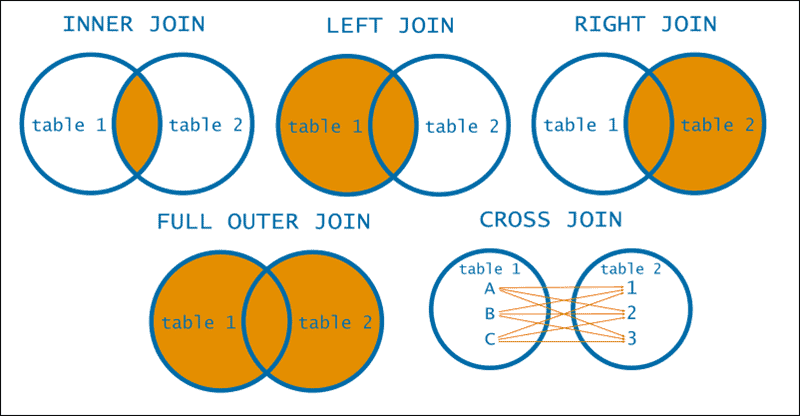

In [33]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)
cursor=mydb.cursor()

In [27]:
query="CREATE TABLE employees (id INT AUTO_INCREMENT PRIMARY KEY,name VARCHAR(255) NOT NULL,department_id INT,salary DECIMAL(10, 2),hire_date DATE)"

cursor.execute(query)

**Create Departments table :**

In [28]:
cursor.execute("CREATE TABLE departments (id INT AUTO_INCREMENT PRIMARY KEY,department_name VARCHAR(255) NOT NULL)")

**Insert data into the tables:**

In [29]:
# Insert data into the employees table
employee_data = [
    ('John Doe', 1, 60000.00, '2020-01-15'),
    ('Jane Smith', 2, 55000.00, '2019-05-20'),
    ('Bob Johnson', 1, 62000.00, '2021-03-10'),
    ('Alice Brown', 3, 58000.00, '2018-11-05')
]


query = "INSERT INTO employees (name, department_id, salary, hire_date) VALUES (%s, %s, %s, %s)"
cursor.executemany(query, employee_data)
mydb.commit()



In [35]:
# Insert data into the departments table
department_data = [('HR',),('IT',),('Sales',)]

insert_department_query = "INSERT INTO departments (department_name) VALUES (%s)"
cursor.executemany(insert_department_query, department_data)
mydb.commit()

In [36]:
cursor.execute("SELECT * FROM  employees ")
cursor.fetchall()

[(1, 'John Doe', 1, Decimal('60000.00'), datetime.date(2020, 1, 15)),
 (2, 'Jane Smith', 2, Decimal('55000.00'), datetime.date(2019, 5, 20)),
 (3, 'Bob Johnson', 1, Decimal('62000.00'), datetime.date(2021, 3, 10)),
 (4, 'Alice Brown', 3, Decimal('58000.00'), datetime.date(2018, 11, 5))]

In [37]:
cursor.execute("SELECT * FROM  departments ")
cursor.fetchall()

[(1, 'HR'), (2, 'IT'), (3, 'Sales')]

## 1.Inner Join

In [40]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)
cursor=mydb.cursor()





# INNER JOIN example
query = """
SELECT employees.name, departments.department_name
FROM employees
INNER JOIN departments ON employees.department_id = departments.id
"""

cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print(row)










('John Doe', 'HR')
('Jane Smith', 'IT')
('Bob Johnson', 'HR')
('Alice Brown', 'Sales')


## 2.Left Join

In [41]:
# LEFT JOIN example
query = """
SELECT employees.name, departments.department_name
FROM employees
LEFT JOIN departments ON employees.department_id = departments.id
"""

cursor.execute(query)
result = cursor.fetchall()

print("\nLEFT JOIN:")
for row in result:
    print(row)


LEFT JOIN:
('John Doe', 'HR')
('Jane Smith', 'IT')
('Bob Johnson', 'HR')
('Alice Brown', 'Sales')


## 3.Right Join

In [42]:
# RIGHT JOIN example
query = """
SELECT employees.name, departments.department_name
FROM employees
RIGHT JOIN departments ON employees.department_id = departments.id
"""

cursor.execute(query)
result = cursor.fetchall()

print("\nRIGHT JOIN:")
for row in result:
    print(row)


RIGHT JOIN:
('Bob Johnson', 'HR')
('John Doe', 'HR')
('Jane Smith', 'IT')
('Alice Brown', 'Sales')


## 3. Full Join

In [43]:
# FULL JOIN emulation using UNION of LEFT JOIN and RIGHT JOIN
query = """
SELECT employees.name, departments.department_name
FROM employees
LEFT JOIN departments ON employees.department_id = departments.id
UNION
SELECT employees.name, departments.department_name
FROM employees
RIGHT JOIN departments ON employees.department_id = departments.id
"""

cursor.execute(query)
result = cursor.fetchall()

print("\nFULL JOIN (emulated):")
for row in result:
    print(row)




FULL JOIN (emulated):
('John Doe', 'HR')
('Jane Smith', 'IT')
('Bob Johnson', 'HR')
('Alice Brown', 'Sales')


# Delete Record
    You can delete records from an existing table by using the "DELETE FROM" statement:

In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)
cursor=mydb.cursor()
sql = "DELETE FROM customers WHERE address = 'Mountain 21'"

cursor.execute(sql)

mydb.commit()



In [3]:
print(cursor.rowcount, "record(s) deleted")

1 record(s) deleted


In [5]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor = mydb.cursor()

In [6]:
cursor.execute("SELECT * FROM customers")
cursor.fetchall()

[('Prasad', 'CDA 5', 1),
 ('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14)]

In [7]:
sql="DELETE FROM customers WHERE name='Prasad' "
cursor.execute(sql)
mydb.commit()


In [8]:
print(cursor.rowcount, "record(s) deleted")

1 record(s) deleted


In [9]:
cursor.execute("SELECT * FROM customers")
cursor.fetchall()

[('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Vicky', 'Yellow Garden 2', 10),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14)]

**Important!:** Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.


WHERE clause in the DELETE syntax: The WHERE clause specifies which record(s) that should be deleted. If you omit the WHERE clause, all records will be deleted!

# Prevent SQL Injection
        It is considered a good practice to escape the values of any query, also in delete statements.

        This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

        The mysql.connector module uses the placeholder %s to escape values in the delete statement:

In [10]:
sql = "DELETE FROM customers WHERE address = %s"
adr = ("Yellow Garden 2", )

cursor.execute(sql, adr)

mydb.commit()

print(cursor.rowcount, "record(s) deleted")

1 record(s) deleted


In [11]:
cursor.execute("SELECT * FROM customers")
cursor.fetchall()

[('Peter', 'Lowstreet 4', 2),
 ('Amy', 'Apple st 652', 3),
 ('Michael', 'Valley 345', 5),
 ('Sandy', 'Ocean blvd 2', 6),
 ('Betty', 'Green Grass 1', 7),
 ('Richard', 'Sky st 331', 8),
 ('Susan', 'One way 98', 9),
 ('Ben', 'Park Lane 38', 11),
 ('William', 'Central st 954', 12),
 ('Chuck', 'Main Road 989', 13),
 ('Viola', 'Sideway 1633', 14)]

# Delete a Table

    You can delete an existing table by using the "DROP TABLE" statement:

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)


cursor = mydb.cursor()
query="DROP TABLE customers"

cursor.execute(query)

ProgrammingError: 1051 (42S02): Unknown table 'mydatabase.customers'

# Drop Only if Exist
    If the table you want to delete is already deleted, or for any other reason does not exist, you can use the IF EXISTS keyword to avoid getting an error.

In [2]:
sql="DROP TABLE IF EXISTS customers"
cursor.execute(sql)


In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kanha@8144",
  database="mydatabase"
)

cursor=mydb.cursor()


cursor.execute("SHOW TABLES")
cursor.fetchall()

[]

In [3]:
cursor.execute("SHOW DATABASES")
cursor.fetchall()

[('cardataset',),
 ('information_schema',),
 ('mydatabase',),
 ('mysql',),
 ('performance_schema',),
 ('practicedb',),
 ('students',),
 ('students1',),
 ('sys',)]

In [1]:
!jupyter nbconvert --to webpdf --allow-chromium-download PYTHON_MYSQL.ipynb

[NbConvertApp] Converting notebook PYTHON_MYSQL.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 423960 bytes to PYTHON_MYSQL.pdf
